In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
dfcol =["Year","Day","Hour","WIND Bt, nT","ACE Bt,nT","WIND Bz_gse, nT","ACE Bz_gse, nT"]
df=pd.read_csv('MAGNETIC RECONNECTION\ACE_WIND_dailyavgdata.txt',sep=',',header=None,names=dfcol)
df

,Year,Day,Hour,"WIND Bt, nT","ACE Bt,nT","WIND Bz_gse, nT","ACE Bz_gse, nT"
0,1998,60,0,6.3,6.2,-1.6,-1.9
1,1998,61,0,7.1,6.9,-0.2,-0.5
2,1998,62,0,4.9,4.9,1.3,0.9
3,1998,63,0,6.3,6.3,-2.7,-2.6
4,1998,64,0,11.4,11.4,2.9,3.7
...,...,...,...,...,...,...,...
8253,2020,278,0,2.9,2.8,-0.4,-0.4
8254,2020,279,0,5.2,5.1,-1.4,-1.6
8255,2020,280,0,8.3,8.3,3.4,3.5
8256,2020,281,0,6.4,6.4,1.5,1.3


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8258 entries, 0 to 8257
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             8258 non-null   int64  
 1   Day              8258 non-null   int64  
 2   Hour             8258 non-null   int64  
 3   WIND Bt, nT      8258 non-null   float64
 4   ACE Bt,nT        8258 non-null   float64
 5   WIND Bz_gse, nT  8258 non-null   float64
 6   ACE Bz_gse, nT   8258 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 451.7 KB


In [141]:
df.shape

(8258, 7)

In [142]:
df.isna().sum()

Year               0
Day                0
Hour               0
WIND Bt, nT        0
ACE Bt,nT          0
WIND Bz_gse, nT    0
ACE Bz_gse, nT     0
dtype: int64

In [143]:
df = df[~df.isin([999.9]).any(axis=1)]

In [144]:
df.shape

(7928, 7)

In [145]:
def identifyMR(row):
    if df['ACE Bz_gse, nT'] <0 and df['WIND Bz_gse, nT'] <0:
        return 1
    else:
        return 0

In [146]:
df.columns

Index(['Year', 'Day', 'Hour', 'WIND Bt, nT', 'ACE Bt,nT', 'WIND Bz_gse, nT',
       'ACE Bz_gse, nT'],
      dtype='object')

In [147]:
df['MR'] = np.where((df["WIND Bz_gse, nT"] < 0) & (df["ACE Bz_gse, nT"] < 0), 1, 0)

C:\Users\tanis\AppData\Local\Temp\ipykernel_17328\1766850334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MR'] = np.where((df["WIND Bz_gse, nT"] < 0) & (df["ACE Bz_gse, nT"] < 0), 1, 0)


In [148]:
df['MR'].value_counts()

0    4668
1    3260
Name: MR, dtype: int64

In [149]:
df["datetime_column"] = pd.to_datetime(df["Year"].astype(str) + df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")
df

C:\Users\tanis\AppData\Local\Temp\ipykernel_17328\3209360267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime_column"] = pd.to_datetime(df["Year"].astype(str) + df["Day"].astype(str), format="%Y%j") + pd.to_timedelta(df["Hour"], unit="h")


,Year,Day,Hour,"WIND Bt, nT","ACE Bt,nT","WIND Bz_gse, nT","ACE Bz_gse, nT",MR,datetime_column
0,1998,60,0,6.3,6.2,-1.6,-1.9,1,1998-03-01
1,1998,61,0,7.1,6.9,-0.2,-0.5,1,1998-03-02
2,1998,62,0,4.9,4.9,1.3,0.9,0,1998-03-03
3,1998,63,0,6.3,6.3,-2.7,-2.6,1,1998-03-04
4,1998,64,0,11.4,11.4,2.9,3.7,0,1998-03-05
...,...,...,...,...,...,...,...,...,...
8253,2020,278,0,2.9,2.8,-0.4,-0.4,1,2020-10-04
8254,2020,279,0,5.2,5.1,-1.4,-1.6,1,2020-10-05
8255,2020,280,0,8.3,8.3,3.4,3.5,0,2020-10-06
8256,2020,281,0,6.4,6.4,1.5,1.3,0,2020-10-07


In [150]:
df_2018=df[df['Year']==2018]

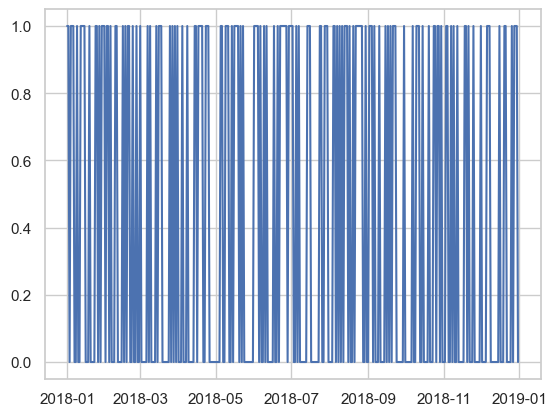

In [151]:
plt.plot(df_2018['datetime_column'],df_2018['MR'])
plt.show()

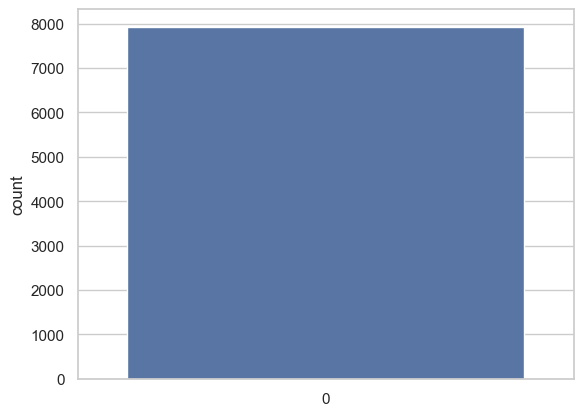

In [152]:
sns.countplot(df['MR'])
plt.show()

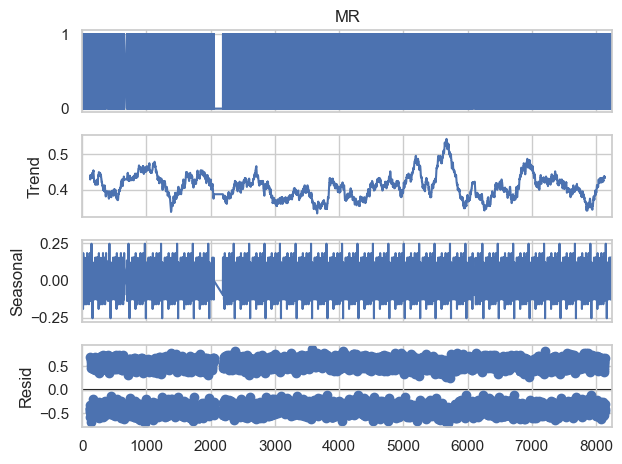

In [153]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x=df['MR'], model='additive',period=240)
result.plot()
plt.show()


In [154]:
df.columns

Index(['Year', 'Day', 'Hour', 'WIND Bt, nT', 'ACE Bt,nT', 'WIND Bz_gse, nT',
       'ACE Bz_gse, nT', 'MR', 'datetime_column'],
      dtype='object')

In [155]:
impcol=['WIND Bz_gse, nT',
       'ACE Bz_gse, nT']

In [156]:

# for i in impcol:
# 	f=abs(np.fft.fft(df[i]))
		
# 		# get the list of frequencies
# 	num=np.size(df['datetime_column'])
# 	freq = [i / num for i in list(range(num))]
# 	# get the list of spectrums
# 	spectrum=f.real*f.real+f.imag*f.imag
# 	nspectrum=spectrum/spectrum[0]

# 	plt.semilogy(freq,nspectrum)
# 	plt.title(i)
# 	# plt.show()
# 	# improve the plot by convertint the data into grouped per week to avoid peaks
	

Text(0.5, 1.0, 'WIND Bz_gse, nT')

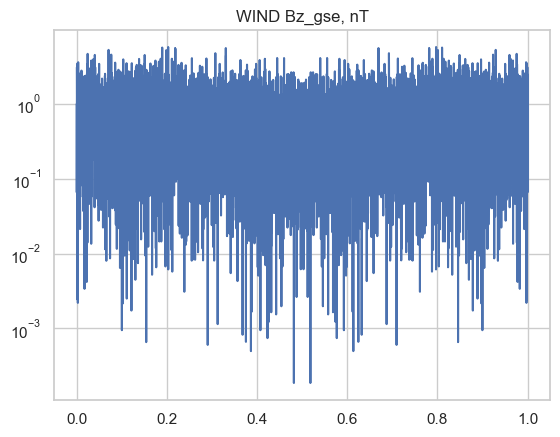

In [157]:
f=abs(np.fft.fft(df['WIND Bz_gse, nT']))
		
		# get the list of frequencies
num=np.size(df['datetime_column'])
freq = [i / num for i in list(range(num))]
# get the list of spectrums
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

plt.semilogy(freq,nspectrum)
plt.title('WIND Bz_gse, nT')

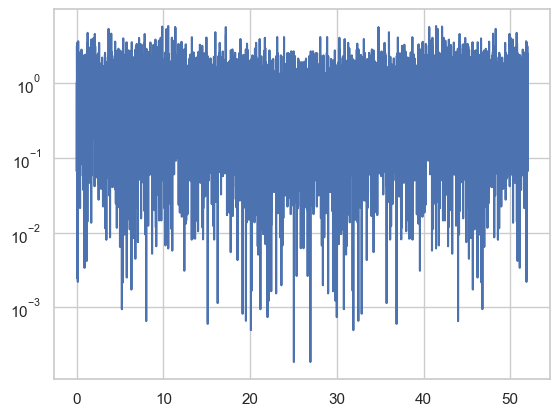

In [158]:
results = pd.DataFrame({'freq': freq, 'nspectrum': nspectrum})
results['period'] = results['freq'] / (1/52)
plt.semilogy(results['period'], results['nspectrum'])

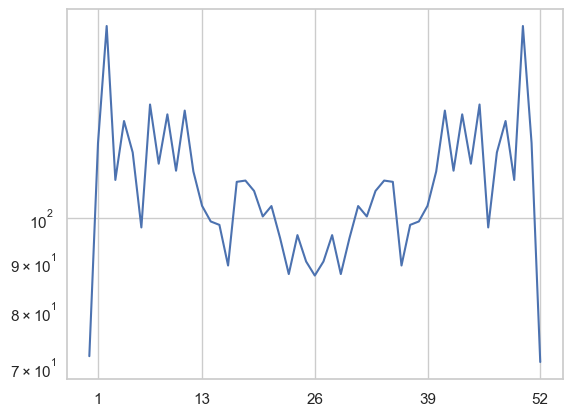

In [159]:

results['period_round'] = results['period'].round()
grouped_week = results.groupby('period_round')['nspectrum'].sum()
plt.semilogy(grouped_week.index, grouped_week)
plt.xticks([1, 13, 26, 39, 52])
plt.show()

C:\Users\tanis\AppData\Local\Temp\ipykernel_17328\2444033608.py:7: RuntimeWarning: divide by zero encountered in divide
  sampling_rate = 1.0 / (time[1] - time[0])  # Sample rate (Hz)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\fft\helper.py:162: RuntimeWarning: divide by zero encountered in double_scalars
  val = 1.0 / (n * d)
c:\Users\tanis\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\fft\helper.py:169: RuntimeWarning: invalid value encountered in multiply
  return results * val


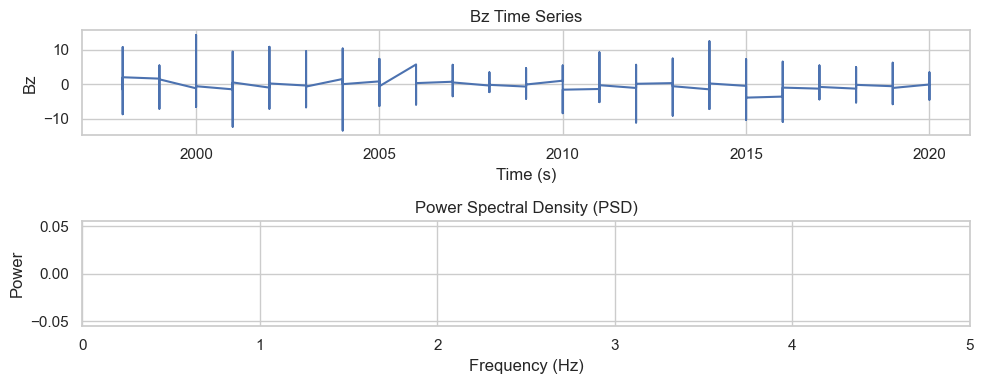

In [160]:
bz_data=df['WIND Bz_gse, nT']
time=df['Year']
fft_result = np.fft.fft(df['WIND Bz_gse, nT'])
psd = np.abs(fft_result)**2

# Define the frequency range corresponding to the FFT output
sampling_rate = 1.0 / (time[1] - time[0])  # Sample rate (Hz)
frequency_range = np.fft.fftfreq(len(time), d=1.0 / sampling_rate)

# Plot the Bz time series data
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(time, bz_data)
plt.title('Bz Time Series')
plt.xlabel('Time (s)')
plt.ylabel('Bz')

# Plot the power spectral density (PSD)
plt.subplot(2, 1, 2)
plt.plot(frequency_range, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.xlim(0, 5)  # Adjust the frequency range as needed
plt.grid(True)

plt.tight_layout()
plt.show()

In [161]:
# df.set_index('datetime_column',inplace=True)

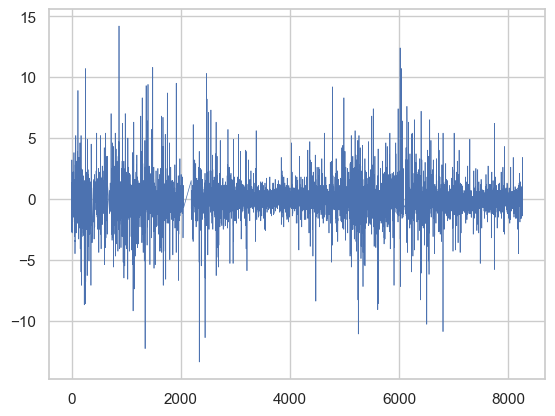

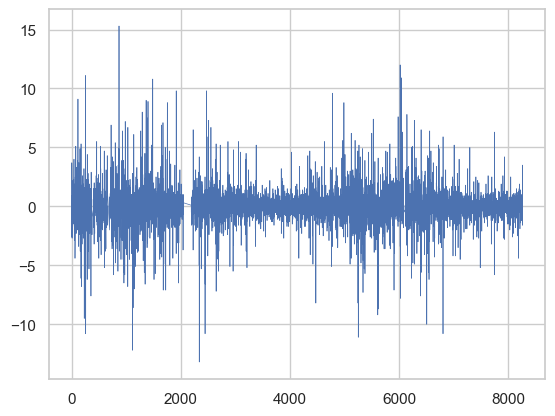

In [162]:

df['WIND Bz_gse, nT'].plot(linewidth=0.5)
plt.show()
df['ACE Bz_gse, nT'].plot(linewidth=0.5)
plt.show()


In [163]:
impcol

['WIND Bz_gse, nT', 'ACE Bz_gse, nT']

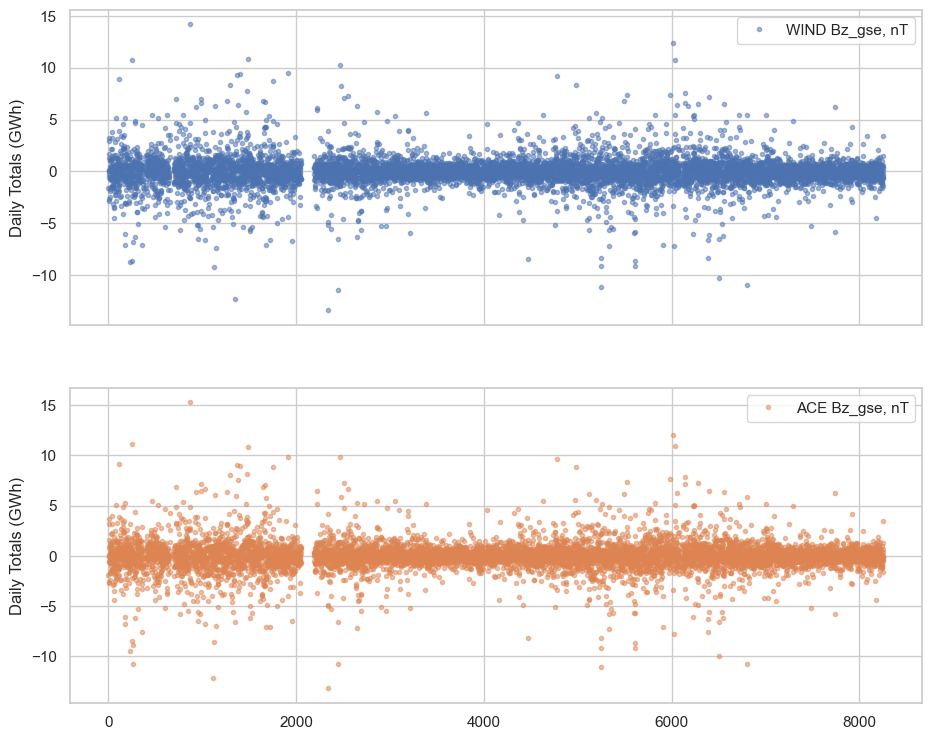

In [164]:
axes = df[impcol].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [165]:
# fig, axes = plt.subplots(2, 1, figsize=(11, 10), sharex=True)
# for name, ax in zip(impcol, axes):
#     sns.boxplot(data=df, x=X, y=name, ax=ax)
#     ax.set_ylabel('GWh')
#     ax.set_title(name)
#     # Remove the automatic x-axis label from all but the bottom subplot
# if ax != axes[-1]:
#     ax.set_xlabel('')

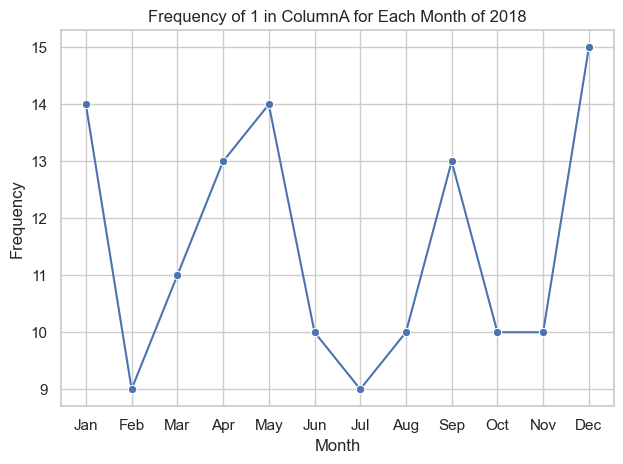

In [166]:
df_plot1 = df[df['datetime_column'].dt.year == 2006]
monthly_counts = df_plot1.groupby(df_plot1['datetime_column'].dt.month)['MR'].sum()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title("Frequency of 1 in ColumnA for Each Month of 2018")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


In [167]:
dict(monthly_counts)

{1: 14,
 2: 9,
 3: 11,
 4: 13,
 5: 14,
 6: 10,
 7: 9,
 8: 10,
 9: 13,
 10: 10,
 11: 10,
 12: 15}

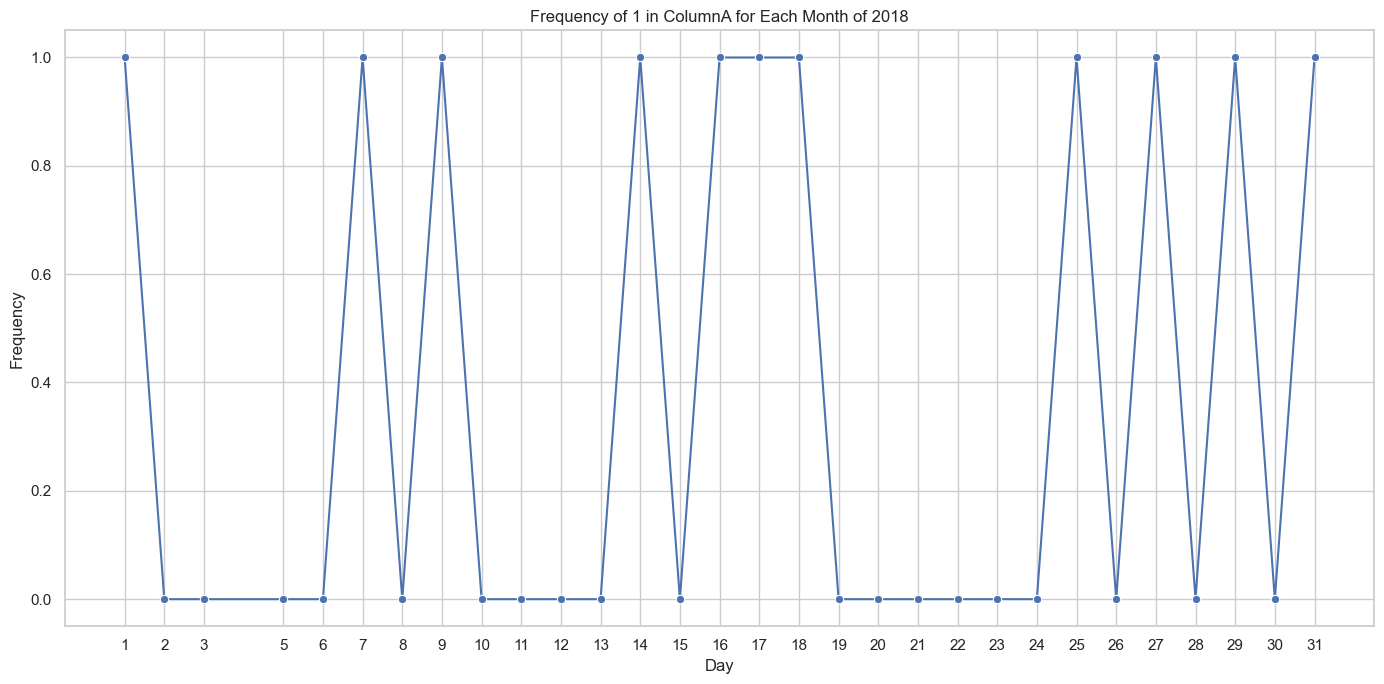

In [168]:
plt.figure(figsize=(14,7))
df_plot2=df[(df['datetime_column'].dt.year == 2018) & (df['datetime_column'].dt.month == 3)]
daily_counts = df_plot2.groupby(df_plot2['datetime_column'].dt.day)['MR'].sum()
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o')
plt.title("Frequency of 1 in ColumnA for Each Month of 2018")
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.xticks(daily_counts.index)
plt.tight_layout()
plt.show()

In [169]:
dict(daily_counts.value_counts())

{0: 19, 1: 11}

In [170]:
X="2018-03-07"
specific_date=pd.to_datetime(X)
df_date=df[df['datetime_column']==specific_date]
if (df_date['MR'].any()==1):
    # return True
    print(True)
else:
    # return False
    print(False)

True


In [172]:
df.to_csv('Occurence of MR.csv',index=False)